# **Question 2:**

It was asked to impelment back propogation algorithm from scratch(Using Numpy) on MNIST Dataset.

**Approach:**

First I tried to implement Stochastic Gradient descent(SGD) from scratch, In SGD we update model weight after every forward propogation of each sample in Training set.I have used sum of square differene as my Error Function, I have trained my model for 20 epoch and for total 2000 sample....I have stored error after every iteration and then plotted Cost function vs Iteration plot. As expected it is clearly visible from plot  that SGD is not at all smooth.  That is because it responds to the effects of each and every sample ,this can be a benefit if we stuckedin between local minima.....SGD will come out of it and try to converge at optimal minima. 


Then as asked in Question I have tried to implement Batch gradient descent....very first thing I like to mentioned that ,it is clearly visible from results that to reach optimal point for minima we need to perform so many iteration as compared to SGD. What make batch grad descent different from SGD is here we update weight after every epoch(after passing all sample from training data ,we accumulate error and back propogate average of that error)

Finally one more thing I would like to mentioned that  when I implement SGD from scratch I got reliable result(Confusion matrix Looks good),But when I implement Batch gradient descent I need to perform so many iteration but still result what I am getting is not like SGD.


In [0]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as PLT
import numpy as NP
import seaborn as SNS

* From Keras I have Imported MNIST Dataset

In [0]:
(X_TRAIN,Y_TRAIN),(X_TEST,Y_TEST)=mnist.load_data()

* We have 60K sample as Training Data and 10K sample as Test data.

In [25]:
print("Type Of TRAIN DATA: {}".format(type(X_TRAIN)))
print("SHAPE OF TRAIN DATA : {}".format(X_TRAIN.shape))
print("Type Of TEST DATA: {}".format(type(X_TEST)))
print("SHAPE OF TEST DATA : {}".format(X_TEST.shape))

Type Of TRAIN DATA: <class 'numpy.ndarray'>
SHAPE OF TRAIN DATA : (60000, 28, 28)
Type Of TEST DATA: <class 'numpy.ndarray'>
SHAPE OF TEST DATA : (10000, 28, 28)


* Normalizing Train and Test DATA

In [0]:
X_TRAIN = X_TRAIN/255.0
X_TEST = X_TEST/255.0


*  Just Printing very first Train smaple point and label correspond to it.

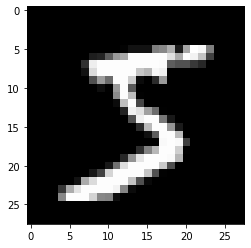

In [27]:
PLT.imshow(X_TRAIN[0],'gray')

* Converting Labels into One hot encoding.

In [0]:
Y_TEST = keras.utils.to_categorical(Y_TEST,num_classes=10,dtype='int32')
Y_TRAIN = keras.utils.to_categorical(Y_TRAIN,num_classes=10,dtype='int32')

In [29]:
Y_TRAIN[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int32)

Weight Initialization: 

In [0]:
WT_1 = NP.random.normal(0,1,(784,150))

WT_2 = NP.random.normal(0,1,(150,100))
WT_3 = NP.random.normal(0,1,(100,50))
WT_4 = NP.random.normal(0,1,(50,10))

# MODEL : 3 hidden layer

Layer 1: 150 neurons

Layer 2 : 100 neurons

Layer 3: 50 neurons

Activation function: Sigmoid.

Optimizer: SGD

Output LAyer: 10 neuron of Sigmoid.

# **Implementing SGD:**

In [0]:
import timeit
start_time = timeit.default_timer()

ERR=[]
VALUE=0
for epoc in range(0,20):
  #print(epoc)
  #if VALUE!=0:
   # VALUE =VALUE/100
    #ERR.append(VALUE)
  VALUE=0
  for sample in range(0,2000):
    
    IP = NP.reshape(X_TRAIN[sample],(784,1))
    Z1 = 1/(1+NP.exp(-NP.dot(NP.transpose(WT_1),IP)))
    Z2 = 1/(1+NP.exp(-NP.dot(NP.transpose(WT_2),Z1)))
    Z3 = 1/(1+NP.exp(-NP.dot(NP.transpose(WT_3),Z2)))
    Z4 = 1/(1+NP.exp(-NP.dot(NP.transpose(WT_4),Z3)))
    
    
    LOCAL_ERROR = Z4-Y_TRAIN[sample].reshape(10,1)
    VALUE=VALUE+0.5*NP.sum(((LOCAL_ERROR)**2))
    ERR.append(VALUE)
    
    TEMP1 =NP.zeros((50,10)) 
    for i in range(0,10):
      TEMP1[:,i] = Z4[i]*(1-Z4[i])
    DIF_Z4_W4 = TEMP1*Z3
    UP_WT_4 = WT_4-(0.2)*(NP.transpose(LOCAL_ERROR)*DIF_Z4_W4)
    
    
    
    B=NP.dot(NP.transpose(LOCAL_ERROR),NP.transpose((WT_4*TEMP1)))
    TEMP2 =NP.zeros((100,50)) 
    for i in range(0,50):
      TEMP2[:,i] = Z3[i]*(1-Z3[i])
    UP_WT_3 = WT_3-(0.2)*B*(TEMP2*Z2)
    
    
    
    C=NP.dot(B,NP.transpose(TEMP2*WT_3))
    TEMP3 =NP.zeros((150,100)) 
    for i in range(0,100):
      TEMP3[:,i] = Z2[i]*(1-Z2[i])
    UP_WT_2=WT_2-(0.2)*C*(TEMP3*Z1)
    
    
    
    D=NP.dot(C,NP.transpose((TEMP3*WT_2)))
    TEMP4 =NP.zeros((784,150)) 
    for i in range(0,150):
      TEMP4[:,i] = Z1[i]*(1-Z1[i])  
    UP_WT_1=WT_1-(0.2)*D*(TEMP4*NP.reshape(X_TRAIN[sample],(784,1)))
    WT_1 = UP_WT_1
    WT_2 = UP_WT_2
    WT_3 = UP_WT_3
    WT_4 = UP_WT_4

    
elapsed = timeit.default_timer() - start_time

In [102]:

print(f"Time Required To run Cell : {elapsed}")

Time Required To run Cell : 134.76489311000114


In [103]:
len(ERR)

40000

# **COST VS iteration**

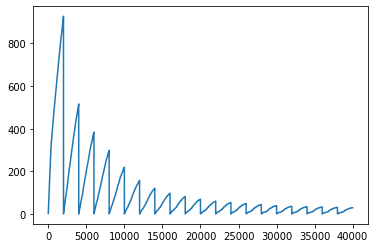

In [104]:

X=list(range(1,40001))
PLT.plot(X,ERR)

In [0]:
# FFN
# PREDICTION
PRED_LABEL=[]
ACTUAL_LABEL=[]
Y=[]
for sample in range(0,2000):
  IP = NP.reshape(X_TEST[sample],(784,1))
  Z1 = 1/(1+NP.exp(-NP.dot(NP.transpose(WT_1),IP)))
  Z2 = 1/(1+NP.exp(-NP.dot(NP.transpose(WT_2),Z1)))
  Z3 = 1/(1+NP.exp(-NP.dot(NP.transpose(WT_3),Z2)))
  Z4 = 1/(1+NP.exp(-NP.dot(NP.transpose(WT_4),Z3)))
  PRED_LABEL.append(NP.argmax(Z4))
  ACTUAL_LABEL.append(NP.argmax(Y_TEST[sample]))
  #print(NP.argmax(Z4),NP.argmax(Y_TEST[sample]))
  

In [0]:

# This Function will take input as PRED_LABEL and ACTUAL LABEL return Confusion MATRIX.
def CONFUSION_MATRIX(PRED_LABEL,Y_TEST):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    plt.figure()
    cm = confusion_matrix(np.array(Y_TEST),np.array(PRED_LABEL))
   # class_label = ['0','1','2','3','4','5','6','7','8','9']
    DATA = pd.DataFrame(cm)#, index = class_label, columns = class_label)
    sns.heatmap(DATA , annot = True, fmt = "d")
    plt.title("Confusiion Matrix for TEST DATA")
    plt.xlabel("PREDICTED LABEL")
    plt.ylabel("TRUE LABEL")
    plt.show()

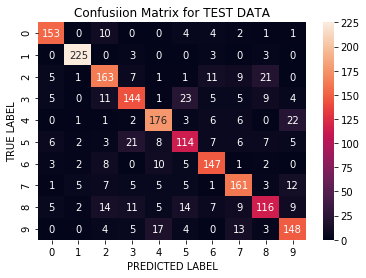

In [109]:
CONFUSION_MATRIX(PRED_LABEL,ACTUAL_LABEL)

# **Implementing Batch Gradient Descent**

In [0]:
WT_1 = NP.random.normal(0,1,(784,150))

WT_2 = NP.random.normal(0,1,(150,100))
WT_3 = NP.random.normal(0,1,(100,50))
WT_4 = NP.random.normal(0,1,(50,10))

**FIRST APPROACH: 20K epoch of 2000 sample**

In [32]:
# 20K epoch of 2000 sample

import timeit
start_time = timeit.default_timer()
ERR=[]
VALUE=0
LOCAL_ERROR= NP.zeros((10,1))
LES= NP.zeros((10,1))
for epoc in range(0,20000):
  print(epoc)
  VALUE=0
  LOCAL_ERROR= NP.zeros((10,1))
  LES= NP.zeros((10,1))
  for sample in range(0,2000):
    
    IP = NP.reshape(X_TRAIN[sample],(784,1))
    Z1 = 1/(1+NP.exp(-NP.dot(NP.transpose(WT_1),IP)))
    Z2 = 1/(1+NP.exp(-NP.dot(NP.transpose(WT_2),Z1)))
    Z3 = 1/(1+NP.exp(-NP.dot(NP.transpose(WT_3),Z2)))
    Z4 = 1/(1+NP.exp(-NP.dot(NP.transpose(WT_4),Z3)))
    
    
    LOCAL_ERROR = LOCAL_ERROR+(Z4-Y_TRAIN[sample].reshape(10,1))
    LES=LES+(LOCAL_ERROR)**2 
    #VALUE=VALUE+0.5*NP.sum(((LOCAL_ERROR)**2))
    #ERR.append(VALUE)
  LOCAL_ERROR=(1/2000)*LOCAL_ERROR
  VALUE=VALUE+(1/4000)*NP.sum(LES)
  ERR.append(VALUE)
  TEMP1 =NP.zeros((50,10)) 
  for i in range(0,10):
    TEMP1[:,i] = Z4[i]*(1-Z4[i])
  DIF_Z4_W4 = TEMP1*Z3
  UP_WT_4 = WT_4-(0.2)*(NP.transpose(LOCAL_ERROR)*DIF_Z4_W4)
    
    
    
  B=NP.dot(NP.transpose(LOCAL_ERROR),NP.transpose((WT_4*TEMP1)))
  TEMP2 =NP.zeros((100,50)) 
  for i in range(0,50):
    TEMP2[:,i] = Z3[i]*(1-Z3[i])
  UP_WT_3 = WT_3-(0.2)*B*(TEMP2*Z2)
    
    
    
  C=NP.dot(B,NP.transpose(TEMP2*WT_3))
  TEMP3 =NP.zeros((150,100)) 
  for i in range(0,100):
    TEMP3[:,i] = Z2[i]*(1-Z2[i])
  UP_WT_2=WT_2-(0.2)*C*(TEMP3*Z1)
    
    
    
  D=NP.dot(C,NP.transpose((TEMP3*WT_2)))
  TEMP4 =NP.zeros((784,150)) 
  for i in range(0,150):
    TEMP4[:,i] = Z1[i]*(1-Z1[i])  
  UP_WT_1=WT_1-(0.2)*D*(TEMP4*NP.reshape(X_TRAIN[sample],(784,1)))
  WT_1 = UP_WT_1
  WT_2 = UP_WT_2
  WT_3 = UP_WT_3
  WT_4 = UP_WT_4

elapsed = timeit.default_timer() - start_time
print(f"Time Required To run Cell : {elapsed}")

Time Required To run Cell : 4948.687527753


In [14]:
len(ERR)

40000

**Cost vs Epoch**

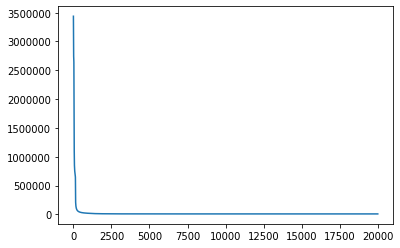

In [35]:
X=list(range(1,20001))
PLT.plot(X,ERR)

In [0]:
# FFN
# PREDICTION
PRED_LABEL=[]
ACTUAL_LABEL=[]
Y=[]
for sample in range(0,10000):
  IP = NP.reshape(X_TEST[sample],(784,1))
  Z1 = 1/(1+NP.exp(-NP.dot(NP.transpose(WT_1),IP)))
  Z2 = 1/(1+NP.exp(-NP.dot(NP.transpose(WT_2),Z1)))
  Z3 = 1/(1+NP.exp(-NP.dot(NP.transpose(WT_3),Z2)))
  Z4 = 1/(1+NP.exp(-NP.dot(NP.transpose(WT_4),Z3)))
  PRED_LABEL.append(NP.argmax(Z4))
  ACTUAL_LABEL.append(NP.argmax(Y_TEST[sample]))
  #print(NP.argmax(Z4),NP.argmax(Y_TEST[sample]))
  
# This Function will take input as PRED_LABEL and ACTUAL LABEL return Confusion MATRIX.
def CONFUSION_MATRIX(PRED_LABEL,Y_TEST):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    plt.figure()
    cm = confusion_matrix(np.array(Y_TEST),np.array(PRED_LABEL))
   # class_label = ['0','1','2','3','4','5','6','7','8','9']
    DATA = pd.DataFrame(cm)#, index = class_label, columns = class_label)
    sns.heatmap(DATA , annot = True, fmt = "d")
    plt.title("Confusiion Matrix for TEST DATA")
    plt.xlabel("PREDICTED LABEL")
    plt.ylabel("TRUE LABEL")
    plt.show()

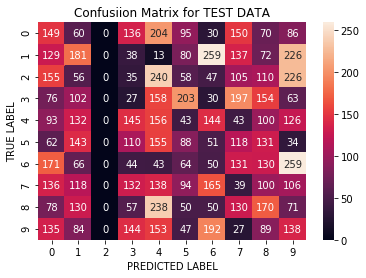

In [22]:
CONFUSION_MATRIX(PRED_LABEL,ACTUAL_LABEL)

**SEcond APPROACH: 2K epoch of 2000 sample**

In [0]:
WT_1 = NP.random.normal(0,1,(784,150))

WT_2 = NP.random.normal(0,1,(150,100))
WT_3 = NP.random.normal(0,1,(100,50))
WT_4 = NP.random.normal(0,1,(50,10))

In [38]:
# 2K epoch of 2000 sample
import timeit
start_time = timeit.default_timer()
ERR=[]
VALUE=0
LOCAL_ERROR= NP.zeros((10,1))
LES= NP.zeros((10,1))
for epoc in range(0,2000):
  print(epoc)
  VALUE=0
  LOCAL_ERROR= NP.zeros((10,1))
  LES= NP.zeros((10,1))
  for sample in range(0,2000):
    
    IP = NP.reshape(X_TRAIN[sample],(784,1))
    Z1 = 1/(1+NP.exp(-NP.dot(NP.transpose(WT_1),IP)))
    Z2 = 1/(1+NP.exp(-NP.dot(NP.transpose(WT_2),Z1)))
    Z3 = 1/(1+NP.exp(-NP.dot(NP.transpose(WT_3),Z2)))
    Z4 = 1/(1+NP.exp(-NP.dot(NP.transpose(WT_4),Z3)))
    
    
    LOCAL_ERROR = LOCAL_ERROR+(Z4-Y_TRAIN[sample].reshape(10,1))
    LES=LES+(LOCAL_ERROR)**2 
    #VALUE=VALUE+0.5*NP.sum(((LOCAL_ERROR)**2))
    #ERR.append(VALUE)
  LOCAL_ERROR=(1/2000)*LOCAL_ERROR
  VALUE=VALUE+(1/4000)*NP.sum(LES)
  ERR.append(VALUE)
  TEMP1 =NP.zeros((50,10)) 
  for i in range(0,10):
    TEMP1[:,i] = Z4[i]*(1-Z4[i])
  DIF_Z4_W4 = TEMP1*Z3
  UP_WT_4 = WT_4-(0.2)*(NP.transpose(LOCAL_ERROR)*DIF_Z4_W4)
    
    
    
  B=NP.dot(NP.transpose(LOCAL_ERROR),NP.transpose((WT_4*TEMP1)))
  TEMP2 =NP.zeros((100,50)) 
  for i in range(0,50):
    TEMP2[:,i] = Z3[i]*(1-Z3[i])
  UP_WT_3 = WT_3-(0.2)*B*(TEMP2*Z2)
    
    
    
  C=NP.dot(B,NP.transpose(TEMP2*WT_3))
  TEMP3 =NP.zeros((150,100)) 
  for i in range(0,100):
    TEMP3[:,i] = Z2[i]*(1-Z2[i])
  UP_WT_2=WT_2-(0.2)*C*(TEMP3*Z1)
    
    
    
  D=NP.dot(C,NP.transpose((TEMP3*WT_2)))
  TEMP4 =NP.zeros((784,150)) 
  for i in range(0,150):
    TEMP4[:,i] = Z1[i]*(1-Z1[i])  
  UP_WT_1=WT_1-(0.2)*D*(TEMP4*NP.reshape(X_TRAIN[sample],(784,1)))
  WT_1 = UP_WT_1
  WT_2 = UP_WT_2
  WT_3 = UP_WT_3
  WT_4 = UP_WT_4

elapsed = timeit.default_timer() - start_time
print(f"Time Required To run Cell : {elapsed}")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

# **Cost Vs Iteration**

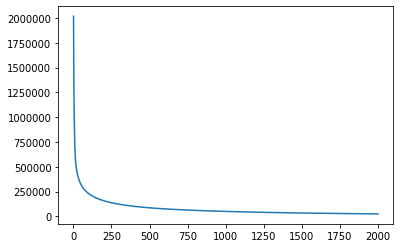

In [39]:
X=list(range(1,2001))
PLT.plot(X,ERR)

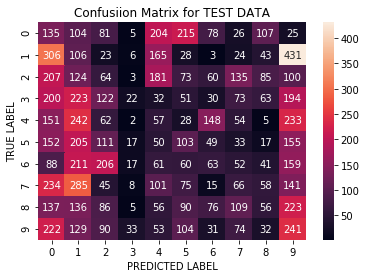

In [40]:
# PREDICTION
PRED_LABEL=[]
ACTUAL_LABEL=[]
Y=[]
for sample in range(0,10000):
  IP = NP.reshape(X_TEST[sample],(784,1))
  Z1 = 1/(1+NP.exp(-NP.dot(NP.transpose(WT_1),IP)))
  Z2 = 1/(1+NP.exp(-NP.dot(NP.transpose(WT_2),Z1)))
  Z3 = 1/(1+NP.exp(-NP.dot(NP.transpose(WT_3),Z2)))
  Z4 = 1/(1+NP.exp(-NP.dot(NP.transpose(WT_4),Z3)))
  PRED_LABEL.append(NP.argmax(Z4))
  ACTUAL_LABEL.append(NP.argmax(Y_TEST[sample]))
  #print(NP.argmax(Z4),NP.argmax(Y_TEST[sample]))
  
# This Function will take input as PRED_LABEL and ACTUAL LABEL return Confusion MATRIX.
def CONFUSION_MATRIX(PRED_LABEL,Y_TEST):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    plt.figure()
    cm = confusion_matrix(np.array(Y_TEST),np.array(PRED_LABEL))
   # class_label = ['0','1','2','3','4','5','6','7','8','9']
    DATA = pd.DataFrame(cm)#, index = class_label, columns = class_label)
    sns.heatmap(DATA , annot = True, fmt = "d")
    plt.title("Confusiion Matrix for TEST DATA")
    plt.xlabel("PREDICTED LABEL")
    plt.ylabel("TRUE LABEL")
    plt.show()
CONFUSION_MATRIX(PRED_LABEL,ACTUAL_LABEL)